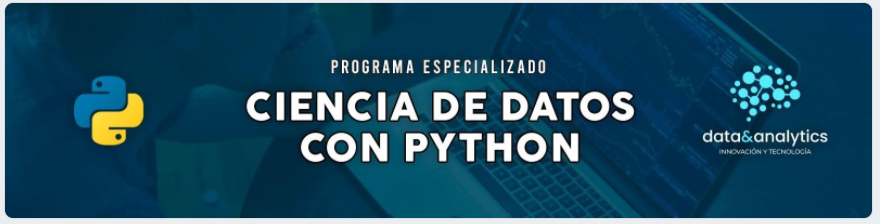

#DATA & ANALYTICS

----------------------------

...

Análisis Exploratorio de datos (EDA) - Estadística Descriptiva

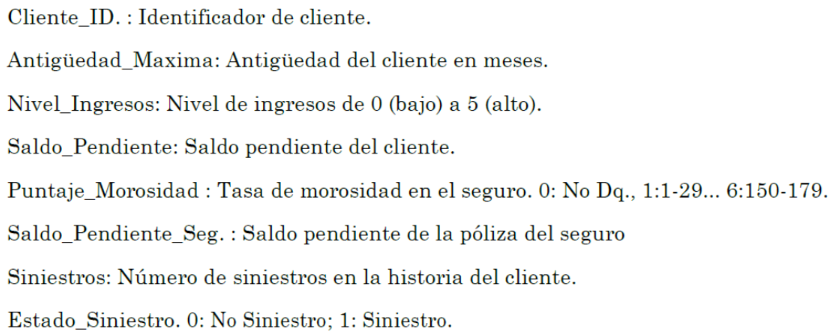

## Preparación del entorno


---



In [1]:
# Tratamiento de datos

import numpy as np
import pandas as pd

# estadística

!pip install statistics
import scipy
from scipy.stats import pearsonr
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import Counter

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
!pip install bioinfokit
from bioinfokit.analys import stat
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=242b8c351be07d3ef6566533eb5bc2a6c19c32b20b3eb1c784966374e6f3539c
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58647 sha256=0963bc9f5743f77f1b73727da3e9a34450307175659196163cf005a24c351297
  Stored in directory: /root/.cache/pip/wheels/f8/6e/14/26f84dc04734d9b4614f1a74154aba345568d65c0c145c6543
Successfully built bioinfokit


In [2]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Preparación de la data a un dataset
---



In [3]:
data = pd.read_excel('/content/drive/MyDrive/Proyectos_Data & Analytics/Proyecto_4/Siniestros.xlsx')
data.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


In [49]:
print("La cantidad de columnas en los datos es: ",data.shape[1])
print("La cantidad de filas en los datos es: ",data.shape[0])

La cantidad de columnas en los datos es:  18
La cantidad de filas en los datos es:  5800


In [50]:
data[data["Cliente_ID"].duplicated()].head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro


In [51]:
data.sort_values(by="Estado_Siniestro")

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3068,517564,64.0,1.0,443.66,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3069,517836,114.0,0.0,248.76,1,1.0,1.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,no
3070,517971,43.0,5.0,4366.12,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3071,518006,100.0,1.0,81.71,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,789697,13.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,NaN
5796,789964,2.0,0.0,2196.94,0,0.0,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5797,790092,4.0,2.0,805.72,0,0.0,0.0,0.0,NaN,NaN,0.0,0,0,0,0,0,0,NaN
5798,790346,0.0,NaN,0.01,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0,0,0,NaN


In [52]:
data["Puntaje_Morosidad2"] = data["Puntaje_Morosidad2"].fillna(0)
data["Puntaje_Morosidad3"] = data["Puntaje_Morosidad3"].fillna(0)
data["Puntaje_Morosidad4"] = data["Puntaje_Morosidad4"].fillna(0)
data["Puntaje_Morosidad5"] = data["Puntaje_Morosidad5"].fillna(0)
data["Puntaje_Morosidad6"] = data["Puntaje_Morosidad6"].fillna(0)

data.sort_values(by="Puntaje_Morosidad2")

data.isnull().sum()

Cliente_ID                0
Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2        0
Puntaje_Morosidad3        0
Puntaje_Morosidad4        0
Puntaje_Morosidad5        0
Puntaje_Morosidad6        0
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

In [53]:
def trimedia(dataset, columna):
  columna = dataset[columna]

  q1 = np.percentile(columna, 25)
  q3 = np.percentile(columna, 75)
  mediana = np.median(columna)

  trimedia = (q1 + 2 * mediana + q3) / 4

  print("Trimedia:", trimedia)

In [55]:
def nan_indices(dataset, columna, cantidad_convertir, valor_convertir):
  nan_indices = dataset[dataset[columna].isnull()].index  # Obtener los índices de los valores NaN
  indices_convertir = nan_indices[:cantidad_convertir]  # Seleccionar los primeros 91 índices
  dataset.loc[indices_convertir, columna] = dataset.loc[indices_convertir, columna].fillna(valor_convertir)

In [54]:
data_prueba = data.copy()

In [56]:
columna = "Antigüedad_Maxima"

print("La cantidad de filas en los datos es: ", data.shape[0])
print("Se eliminarion:", data_prueba[columna].isnull().sum())
data_prueba = data_prueba.dropna(subset=[columna])
print("Restan: ", data_prueba.shape[0])
print("La media es:", data_prueba[columna].mean())

trimedia(data_prueba, columna)

conteo_valores = data[columna].value_counts()
df_conteo = pd.DataFrame(conteo_valores)

La cantidad de filas en los datos es:  5800
Se eliminarion: 587
Restan:  5213
La media es: 49.84711298676386
Trimedia: 39.0


In [57]:
dataset = data
columna = "Antigüedad_Maxima"

nan_indices(dataset, columna, 98, 39.0)
nan_indices(dataset, columna, 98, 49.0)
nan_indices(dataset, columna, 98, 44.0)
nan_indices(dataset, columna, 98, 40.0)
nan_indices(dataset, columna, 98, 43.0)
nan_indices(dataset, columna, 97, 42.0)

In [58]:
columna = "Nivel_Ingresos"

print("La cantidad de filas en los datos es: ", data.shape[0])
data_prueba = data.copy()
print("Se eliminarion:", data_prueba[columna].isnull().sum())
data_prueba = data_prueba.dropna(subset=[columna])
print("Restan: ", data_prueba.shape[0])
print("La media es:", data_prueba[columna].mean())

trimedia(data_prueba, columna)

conteo_valores = data[columna].value_counts()
print(conteo_valores)

La cantidad de filas en los datos es:  5800
Se eliminarion: 273
Restan:  5527
La media es: 1.0712864121584946
Trimedia: 0.75
1.0    2496
0.0    1915
3.0     529
2.0     283
4.0     248
5.0      56
Name: Nivel_Ingresos, dtype: int64


In [59]:
data["Nivel_Ingresos"] = data["Nivel_Ingresos"].fillna(1)

In [75]:
data['Siniestros1'] = data['Siniestros1'].replace(289, 9)
data['Siniestros2'] = data['Siniestros2'].replace(289, 9)
data['Siniestros3'] = data['Siniestros3'].replace(289, 9)
data['Siniestros4'] = data['Siniestros4'].replace(289, 9)
data['Siniestros5'] = data['Siniestros5'].replace(289, 9)
data['Siniestros6'] = data['Siniestros6'].replace(289, 9)

In [76]:
conteo_valores = data["Estado_Siniestro"].value_counts()
print(conteo_valores)

No_siniestro    5304
Si_siniestro     496
Name: Estado_Siniestro, dtype: int64


In [78]:
data

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,Morosidad_total,Siniestros_total
0,185,44.0,Medio_bajo,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
1,238,79.0,Medio_bajo,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
2,346,102.0,Medio_bajo,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
3,460,39.0,Medio_bajo,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
4,549,109.0,Medio_bajo,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,789697,13.0,Bajo,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
5796,789964,2.0,Bajo,2196.94,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
5797,790092,4.0,Medio,805.72,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0
5798,790346,0.0,Medio_bajo,0.01,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,No_siniestro,0.0,0


In [ ]:
columna = "Estado_Siniestro"
data[columna] = data[columna].replace(["no", "si"],
                         [0, 1])
print(data[columna].mean())
data[columna] = data[columna].fillna(0)

In [63]:
columna = "Nivel_Ingresos"
data[columna] = data[columna].replace([0, 1, 2, 3, 4, 5],
                         ["Bajo", "Medio_bajo", "Medio", "Medio_alto","Moderado", "Alto"])
conteo_valores = data[columna].value_counts()
print(conteo_valores)

Medio_bajo    2769
Bajo          1915
Medio_alto     529
Medio          283
Moderado       248
Alto            56
Name: Nivel_Ingresos, dtype: int64


In [64]:
columna = "Estado_Siniestro"
data[columna] = data[columna].replace([0, 1],
                         ["No_siniestro", "Si_siniestro"])

In [101]:
dataset = data
data['Morosidad_total'] = data[['Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6']].sum(axis=1)
data['Siniestros_total'] = data[['Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6']].sum(axis=1)

In [66]:
data.tail(20)

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro,Morosidad_total,Siniestros_total
5780,776631,109.0,Bajo,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,No_siniestro,0.0,0
5781,778858,5.0,Bajo,2756.96,1,1.0,0.0,1.0,0.0,0.0,0.00,1,0,0,0,0,0,No_siniestro,3.0,1
5782,779794,9.0,Bajo,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,No_siniestro,0.0,0
5783,780104,19.0,Bajo,1549.61,0,0.0,0.0,0.0,2.0,2.0,0.00,5,8,8,9,5,4,No_siniestro,4.0,39
5784,780459,35.0,Medio_bajo,743.60,0,1.0,0.0,0.0,0.0,0.0,0.00,0,1,1,0,0,0,No_siniestro,1.0,2
5785,780669,4.0,Bajo,1032.41,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,No_siniestro,0.0,0
5786,781018,29.0,Medio_bajo,33.38,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,No_siniestro,0.0,0
5787,782656,10.0,Bajo,283.43,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,No_siniestro,0.0,0
5788,783141,4.0,Medio,1100.20,0,0.0,0.0,0.0,0.0,0.0,41349.90,0,0,0,0,0,0,No_siniestro,0.0,0
5789,784197,5.0,Medio,4078.44,0,0.0,0.0,0.0,0.0,0.0,55517.31,0,0,0,0,0,0,No_siniestro,0.0,0


In [102]:
data_cuantitativo = data.loc[:, ['Cliente_ID', 'Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Morosidad_total', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6', 'Siniestros_total']]
data_cualitativo = data.loc[:, ['Nivel_Ingresos', 'Estado_Siniestro']]
data_comp = pd.merge(data_cualitativo, data_cuantitativo, left_index=True, right_index=True)

In [12]:
from google.colab import files
data_comp.to_csv('data_comp.csv', index=False)
files.download('data_comp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
data_comp.isnull().sum()

Nivel_Ingresos         0
Estado_Siniestro       0
Cliente_ID             0
Antigüedad_Maxima      0
Saldo_Pendiente        0
Saldo_Pendiente_Seg    0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Morosidad_total        0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Siniestros_total       0
dtype: int64

### Acesso a la nueva data

In [4]:
data_comp = pd.read_csv('/content/drive/MyDrive/Proyectos_Data & Analytics/Proyecto_4/data_comp.csv')
var_num = data_comp.select_dtypes(include=['float64', 'int']).columns
data_comp.head()

,Nivel_Ingresos,Estado_Siniestro,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
0,Medio_bajo,No_siniestro,94130,42,0.00,0.0,0,1,0,0,0,0,1,9,9,9,9,9,9,54
1,Medio_bajo,No_siniestro,17565,15,5485.37,0.0,1,2,1,0,0,2,6,69,68,65,47,33,15,297
2,Bajo,No_siniestro,624525,13,2274.38,0.0,2,1,0,2,3,3,11,42,40,43,42,41,33,241
3,Medio_bajo,No_siniestro,136621,33,482.14,0.0,0,0,0,0,0,0,0,40,40,40,40,40,40,240
4,Medio_bajo,Si_siniestro,512599,29,8.31,0.0,0,7,7,7,7,7,35,39,39,39,40,39,39,235


In [5]:
data_cuantitativo = data_comp.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Morosidad_total', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6', 'Siniestros_total']]

In [6]:
data_cuantitativo_id = data_comp.loc[:, ['Cliente_ID', 'Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Morosidad_total', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6', 'Siniestros_total']]

In [7]:
data_comp.describe().T.round(10)

,count,mean,std,min,25%,50%,75%,max
Cliente_ID,5800.0,396733.357414,230285.889850,185.0,195501.2500,403865.000,598317.7500,790771.00
Antigüedad_Maxima,5800.0,49.137414,44.667682,0.0,14.0000,39.000,68.0000,255.00
Saldo_Pendiente,5800.0,3240.983681,6157.722805,0.0,329.7475,1100.315,3265.3225,124102.08
Saldo_Pendiente_Seg,5800.0,4970.516469,22016.410538,0.0,0.0000,0.000,0.0000,442334.80
Puntaje_Morosidad1,5800.0,0.199310,0.679003,0.0,0.0000,0.000,0.0000,6.00
Puntaje_Morosidad2,5800.0,0.235690,0.877848,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad3,5800.0,0.210517,0.824897,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad4,5800.0,0.182241,0.759190,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad5,5800.0,0.172586,0.719526,0.0,0.0000,0.000,0.0000,7.00
Puntaje_Morosidad6,5800.0,0.158103,0.679310,0.0,0.0000,0.000,0.0000,7.00


### EDA


---



#### Media

In [8]:
def media(x):
  return stats.mean(x)

In [9]:
data_comp[var_num].apply(media, axis=0).round(2)

Cliente_ID             396733.36
Antigüedad_Maxima          49.14
Saldo_Pendiente          3240.98
Saldo_Pendiente_Seg      4970.52
Puntaje_Morosidad1          0.20
Puntaje_Morosidad2          0.24
Puntaje_Morosidad3          0.21
Puntaje_Morosidad4          0.18
Puntaje_Morosidad5          0.17
Puntaje_Morosidad6          0.16
Morosidad_total             1.16
Siniestros1                 0.74
Siniestros2                 0.65
Siniestros3                 0.60
Siniestros4                 0.55
Siniestros5                 0.50
Siniestros6                 0.46
Siniestros_total            3.48
dtype: float64

#### Moda

In [10]:
def moda(x):
  c = Counter(x)
  return c.most_common(1)

In [11]:
data_comp[var_num].apply(moda, axis=0)

,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
0,"(94130, 1)","(7, 165)","(0.0, 331)","(0.0, 5324)","(0, 5158)","(0, 5127)","(0, 5171)","(0, 5226)","(0, 5233)","(0, 5260)","(0, 4474)","(0, 4798)","(0, 4878)","(0, 4882)","(0, 4931)","(0, 4970)","(0, 5031)","(0, 4331)"


#### Centro de Amplitud

In [12]:
def centro_amplitud(x):
  return (max(x) + min(x))/2

In [13]:
data_comp[var_num].apply(centro_amplitud, axis=0).round(2)

Cliente_ID             395478.00
Antigüedad_Maxima         127.50
Saldo_Pendiente         62051.04
Saldo_Pendiente_Seg    221167.40
Puntaje_Morosidad1          3.00
Puntaje_Morosidad2          3.50
Puntaje_Morosidad3          3.50
Puntaje_Morosidad4          3.50
Puntaje_Morosidad5          3.50
Puntaje_Morosidad6          3.50
Morosidad_total            19.00
Siniestros1                34.50
Siniestros2                34.00
Siniestros3                32.50
Siniestros4                23.50
Siniestros5                20.50
Siniestros6                20.00
Siniestros_total          148.50
dtype: float64

#### Media Geométrica

In [14]:
def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return np.exp(a.sum()/len(a)).round(2)

In [15]:
data_comp[var_num].apply(media_geometrica, axis=0)

Cliente_ID             287336.93
Antigüedad_Maxima           0.00
Saldo_Pendiente             0.00
Saldo_Pendiente_Seg         0.00
Puntaje_Morosidad1          0.00
Puntaje_Morosidad2          0.00
Puntaje_Morosidad3          0.00
Puntaje_Morosidad4          0.00
Puntaje_Morosidad5          0.00
Puntaje_Morosidad6          0.00
Morosidad_total             0.00
Siniestros1                 0.00
Siniestros2                 0.00
Siniestros3                 0.00
Siniestros4                 0.00
Siniestros5                 0.00
Siniestros6                 0.00
Siniestros_total            0.00
dtype: float64

#### Media Armónica

In [16]:
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

In [17]:
data_comp[var_num].apply(media_armonica, axis=0)

,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
0,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica
1,74186.41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Trimedia

In [18]:
def trimedia_completo(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t

In [19]:
data_comp[var_num].apply(trimedia_completo, axis=0).round(2)

Cliente_ID             400387.25
Antigüedad_Maxima          40.00
Saldo_Pendiente          1448.93
Saldo_Pendiente_Seg         0.00
Puntaje_Morosidad1          0.00
Puntaje_Morosidad2          0.00
Puntaje_Morosidad3          0.00
Puntaje_Morosidad4          0.00
Puntaje_Morosidad5          0.00
Puntaje_Morosidad6          0.00
Morosidad_total             0.00
Siniestros1                 0.00
Siniestros2                 0.00
Siniestros3                 0.00
Siniestros4                 0.00
Siniestros5                 0.00
Siniestros6                 0.00
Siniestros_total            0.25
dtype: float64

### Graficación de datos

In [20]:
correlacion = data_comp[var_num].corr(method='pearson').round(3)  # paramétrico

correlacion

,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
Cliente_ID,1.000,-0.074,0.014,0.011,0.007,-0.001,0.001,-0.005,-0.011,-0.018,-0.005,-0.013,-0.015,-0.016,-0.017,-0.020,-0.016,-0.017
Antigüedad_Maxima,-0.074,1.000,0.165,0.106,-0.107,-0.072,-0.057,-0.049,-0.035,-0.023,-0.066,-0.064,-0.054,-0.047,-0.035,-0.029,-0.023,-0.046
Saldo_Pendiente,0.014,0.165,1.000,0.251,-0.029,-0.034,-0.034,-0.023,-0.014,-0.013,-0.029,-0.032,-0.034,-0.041,-0.040,-0.043,-0.042,-0.040
Saldo_Pendiente_Seg,0.011,0.106,0.251,1.000,-0.053,-0.029,-0.027,-0.023,-0.023,-0.018,-0.033,-0.036,-0.031,-0.028,-0.009,-0.010,-0.007,-0.022
Puntaje_Morosidad1,0.007,-0.107,-0.029,-0.053,1.000,0.611,0.520,0.402,0.338,0.276,0.605,0.410,0.365,0.329,0.280,0.248,0.217,0.328
Puntaje_Morosidad2,-0.001,-0.072,-0.034,-0.029,0.611,1.000,0.890,0.817,0.755,0.691,0.931,0.443,0.428,0.410,0.397,0.370,0.343,0.418
Puntaje_Morosidad3,0.001,-0.057,-0.034,-0.027,0.520,0.890,1.000,0.880,0.814,0.743,0.946,0.397,0.392,0.387,0.378,0.353,0.331,0.390
Puntaje_Morosidad4,-0.005,-0.049,-0.023,-0.023,0.402,0.817,0.880,1.000,0.867,0.796,0.926,0.354,0.355,0.360,0.367,0.342,0.327,0.365
Puntaje_Morosidad5,-0.011,-0.035,-0.014,-0.023,0.338,0.755,0.814,0.867,1.000,0.869,0.898,0.336,0.338,0.339,0.354,0.348,0.326,0.353
Puntaje_Morosidad6,-0.018,-0.023,-0.013,-0.018,0.276,0.691,0.743,0.796,0.869,1.000,0.843,0.328,0.333,0.338,0.352,0.349,0.338,0.352


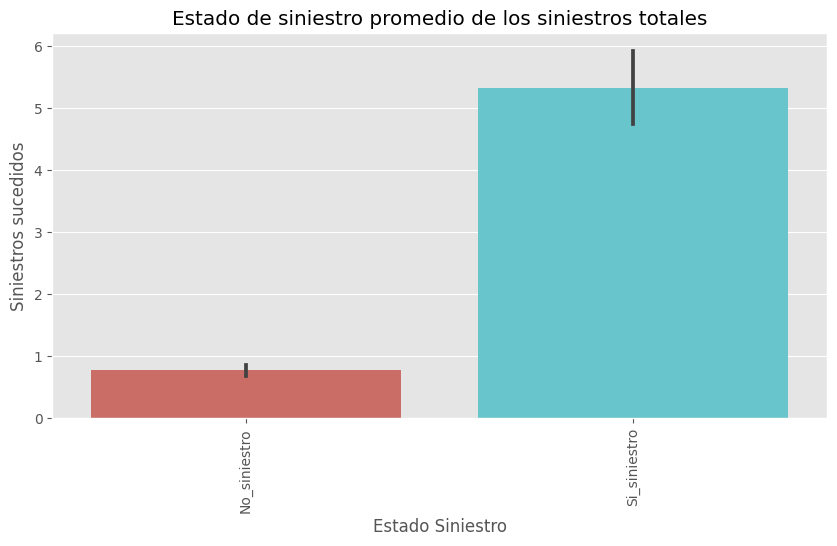

In [21]:
plt.figure(figsize=(10,5))

g = sns.barplot(y="Morosidad_total",
            x="Estado_Siniestro",
            data=data_comp,
            palette="hls" # "Blues"
            )
g.set_xlabel("Estado Siniestro")
g.set_ylabel("Siniestros sucedidos")
g.set_title("Estado de siniestro promedio de los siniestros totales")

plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

Text(0.5, 1.0, 'Estado Siniestro según la antiguedad')

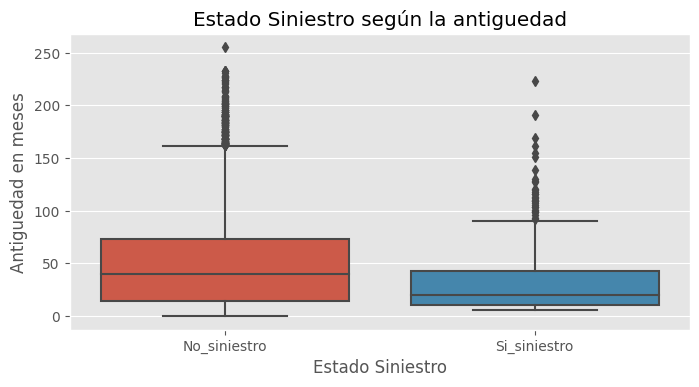

In [22]:
fig, ax = plt.subplots(figsize=(8, 3.84))

g=sns.boxplot(
        x     = 'Estado_Siniestro',  # variable cualitativa
        y     = 'Antigüedad_Maxima',  # variable cuantitativa
        data  = data_comp,   # dataframe
        ax    = ax
    )

g.set_xlabel("Estado Siniestro")
g.set_ylabel("Antiguedad en meses")
g.set_title("Estado Siniestro según la antiguedad")

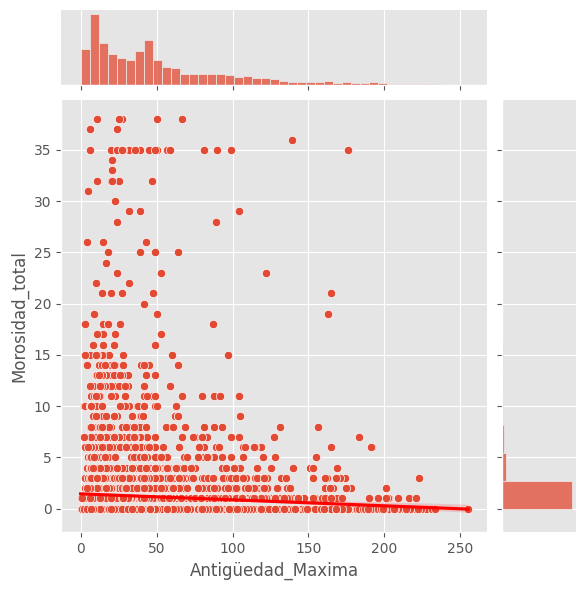

In [23]:
# con línea de tendencia
g=sns.jointplot(x=data_comp['Antigüedad_Maxima'], y=data_comp['Morosidad_total'])

sns.regplot(data=data_comp  , x= 'Antigüedad_Maxima', y='Morosidad_total', ax=g.ax_joint, scatter=False, color= 'red');

Text(0.5, 1.0, 'Gráfico de la correlación de las variables numéricas')

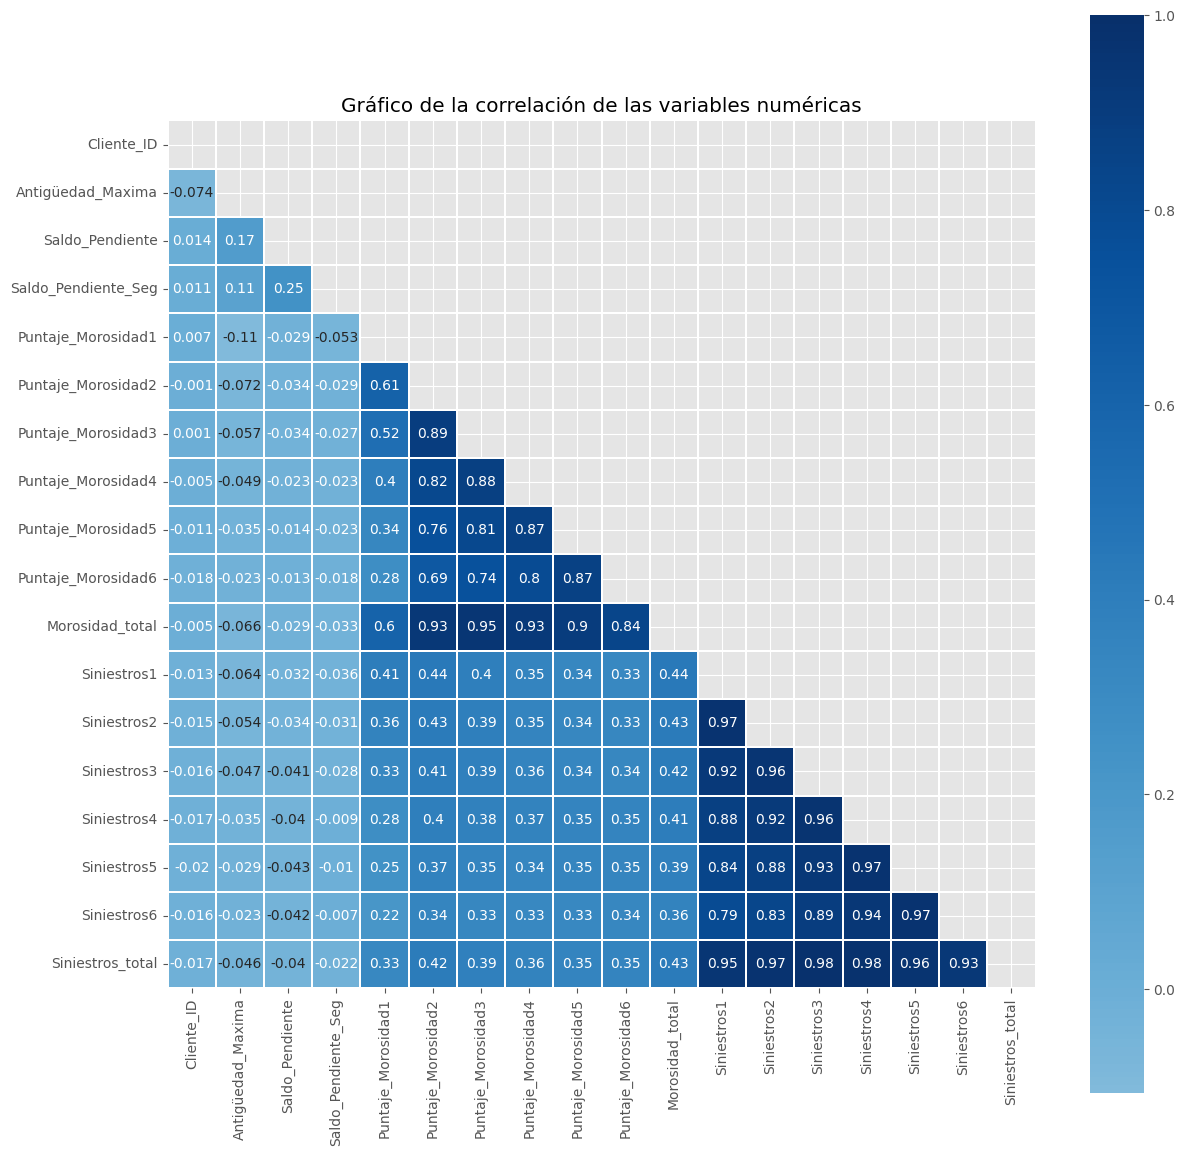

In [24]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (14,14)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico de la correlación de las variables numéricas")

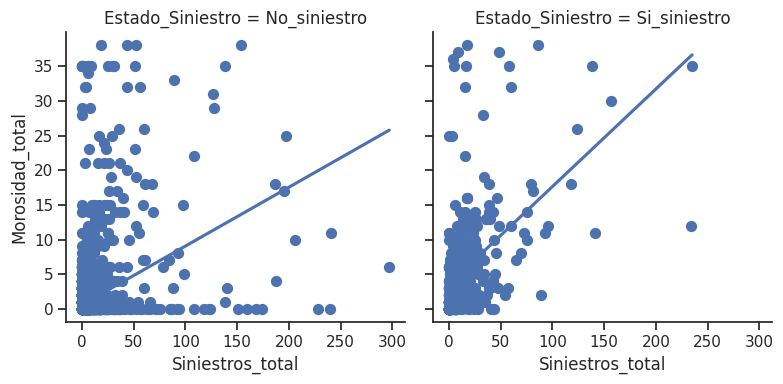

In [25]:
# con línea de tendencia por grupos

sns.set(style="ticks")
sns.lmplot(x="Siniestros_total", y="Morosidad_total", col='Estado_Siniestro', data=data_comp,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

In [26]:
# Correlación: Rho de Spearman

Rho = data_comp[var_num].corr(method='spearman').round(3) # no paramétrico
Rho

,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
Cliente_ID,1.000,-0.090,-0.005,0.017,0.014,0.001,-0.007,-0.025,-0.039,-0.052,-0.035,0.008,0.017,0.009,-0.008,-0.010,-0.009,0.002
Antigüedad_Maxima,-0.090,1.000,0.112,0.130,-0.117,-0.093,-0.073,-0.053,-0.032,-0.013,-0.064,-0.116,-0.088,-0.089,-0.077,-0.069,-0.060,-0.128
Saldo_Pendiente,-0.005,0.112,1.000,0.149,0.058,0.046,0.023,0.019,0.033,0.026,0.069,0.010,-0.004,-0.017,-0.029,-0.023,-0.028,0.026
Saldo_Pendiente_Seg,0.017,0.130,0.149,1.000,-0.076,-0.063,-0.063,-0.054,-0.053,-0.045,-0.079,-0.079,-0.071,-0.074,-0.067,-0.063,-0.057,-0.084
Puntaje_Morosidad1,0.014,-0.117,0.058,-0.076,1.000,0.656,0.585,0.478,0.427,0.353,0.692,0.492,0.435,0.407,0.356,0.319,0.292,0.445
Puntaje_Morosidad2,0.001,-0.093,0.046,-0.063,0.656,1.000,0.681,0.586,0.498,0.436,0.728,0.484,0.471,0.436,0.394,0.352,0.319,0.459
Puntaje_Morosidad3,-0.007,-0.073,0.023,-0.063,0.585,0.681,1.000,0.635,0.566,0.492,0.710,0.462,0.463,0.469,0.414,0.363,0.336,0.452
Puntaje_Morosidad4,-0.025,-0.053,0.019,-0.054,0.478,0.586,0.635,1.000,0.615,0.529,0.674,0.415,0.432,0.450,0.441,0.365,0.343,0.428
Puntaje_Morosidad5,-0.039,-0.032,0.033,-0.053,0.427,0.498,0.566,0.615,1.000,0.609,0.663,0.378,0.389,0.397,0.400,0.390,0.349,0.402
Puntaje_Morosidad6,-0.052,-0.013,0.026,-0.045,0.353,0.436,0.492,0.529,0.609,1.000,0.634,0.344,0.361,0.384,0.383,0.389,0.387,0.375


Text(0.5, 1.0, 'Gráfico Nº 4: Gráfico de la correlación Rho de Spearman')

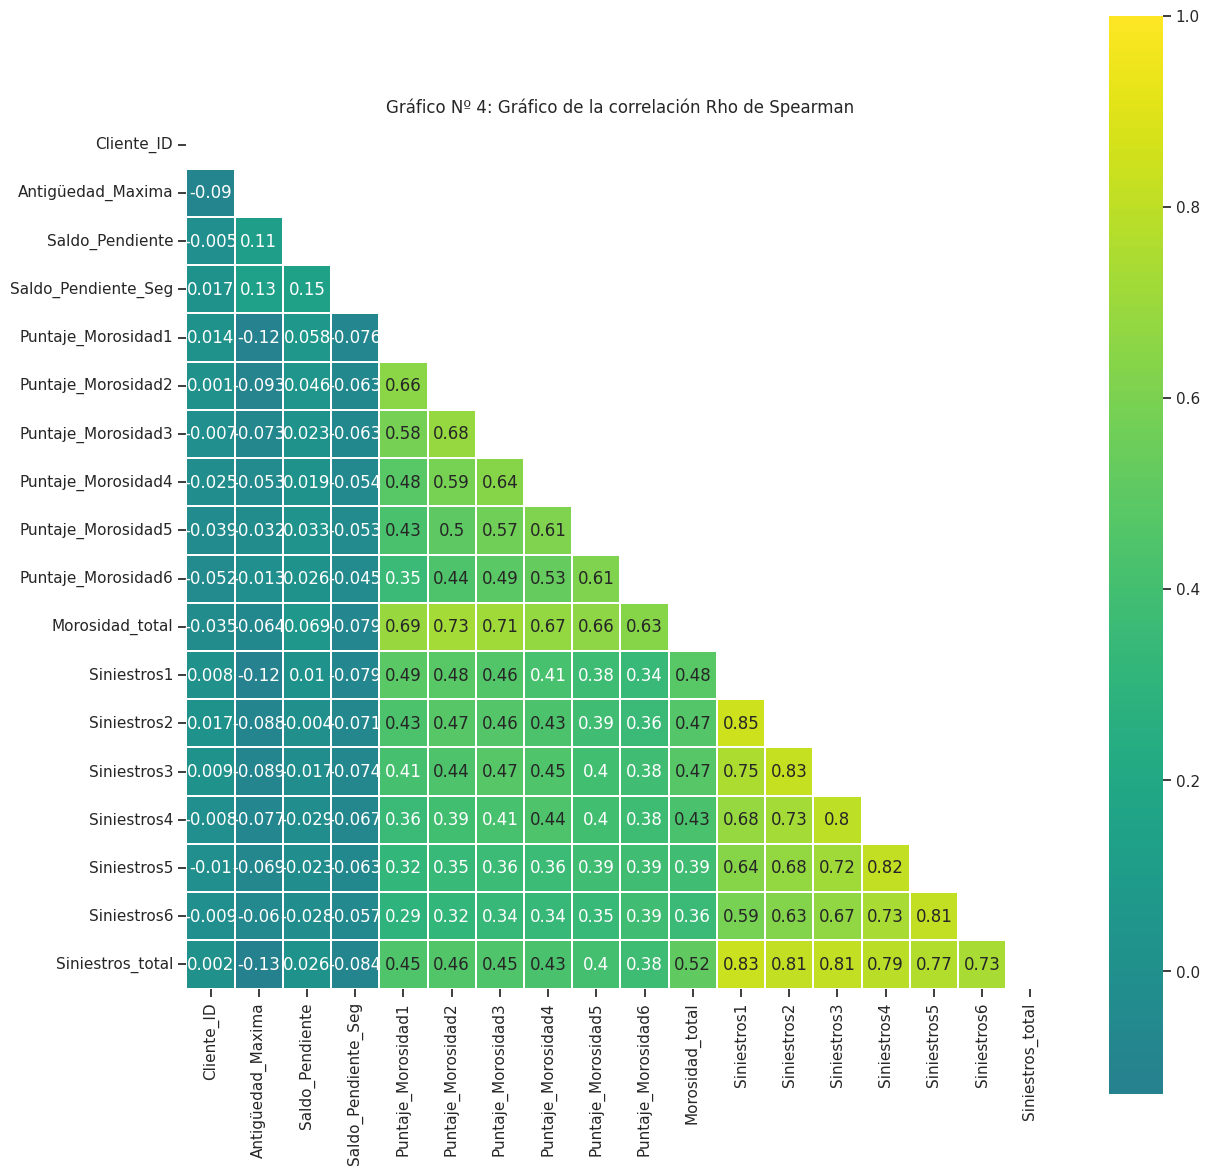

In [27]:
mask = np.triu(np.ones_like(Rho, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (14,14)) # la base para el gráfico
g = sns.heatmap(Rho, mask = mask, cmap='viridis', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº 4: Gráfico de la correlación Rho de Spearman")

In [28]:
def displot_varnum(x: str, data: pd.DataFrame):
    '''
    Devuelve 3 gráficos:
    .Gráfico de Histograma con Curva

    Parámetros
    ----------

    `x` : variable numérica.
    `data` : DataFrame
    `v_cat` : variable cualitativa | variable de exploración

    Colores por default, definidos en la función

    Ejemplos:
    --------

    '''
   # Histograma con Curva
    sns.color_palette("light:b", as_cmap=True)

    sns.displot(
        x = x,
        data  = data,
        kde=True,
        color = "#039BE5"
        ).set(title='Gráfico: Histograma con Curva')

In [29]:
columns = data_comp.select_dtypes(exclude=['object']).columns

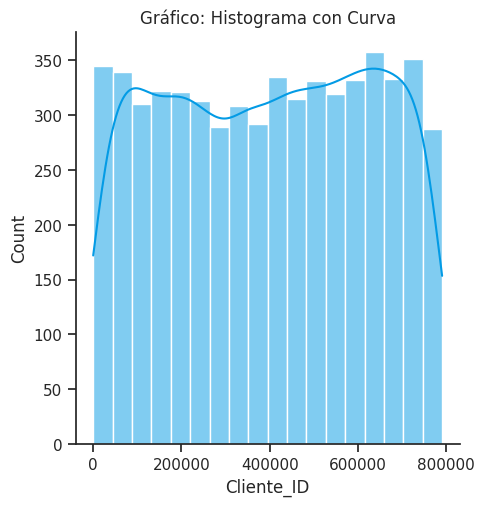

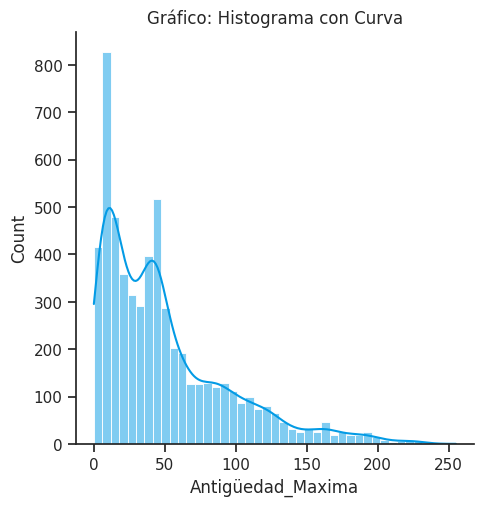

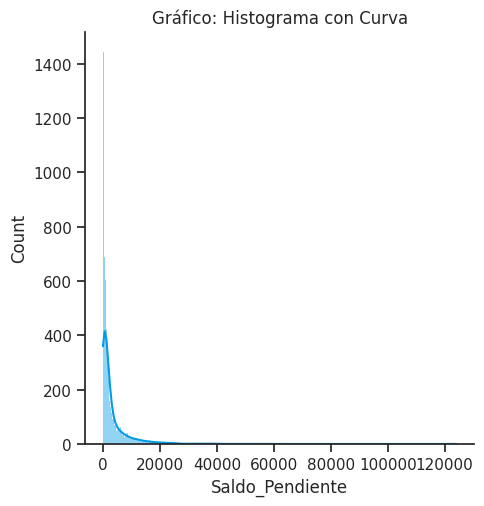

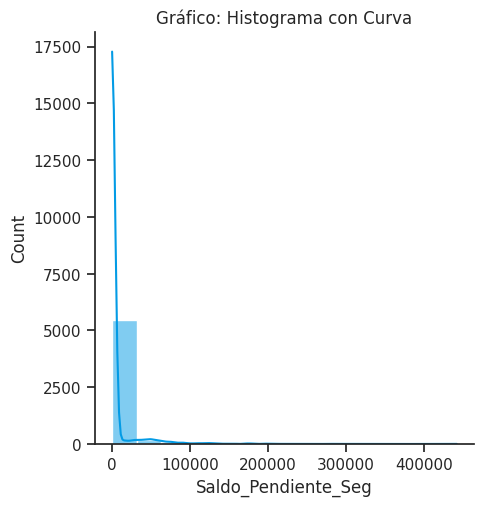

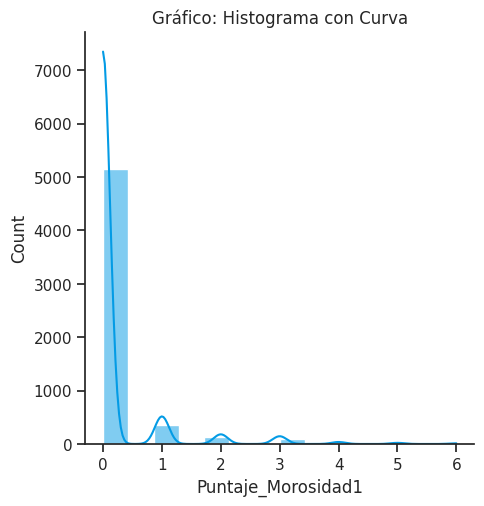

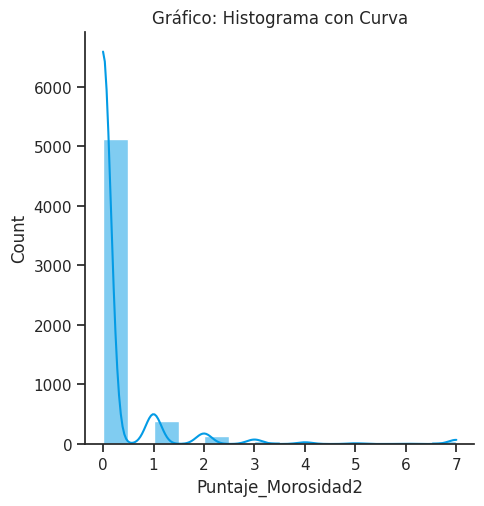

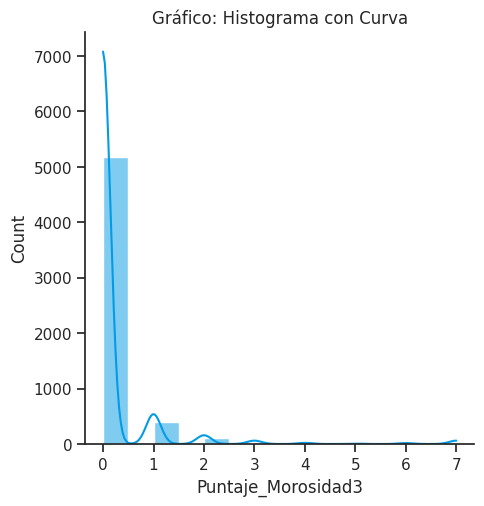

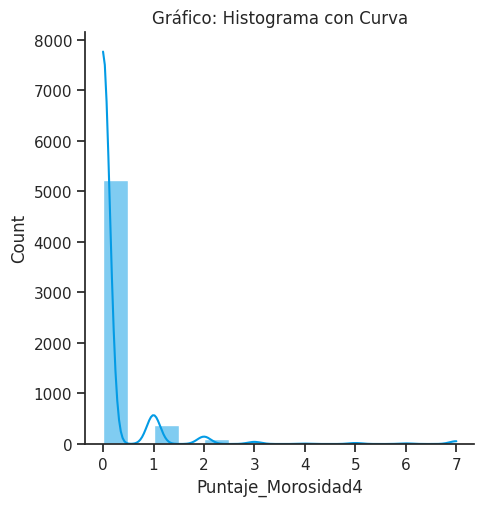

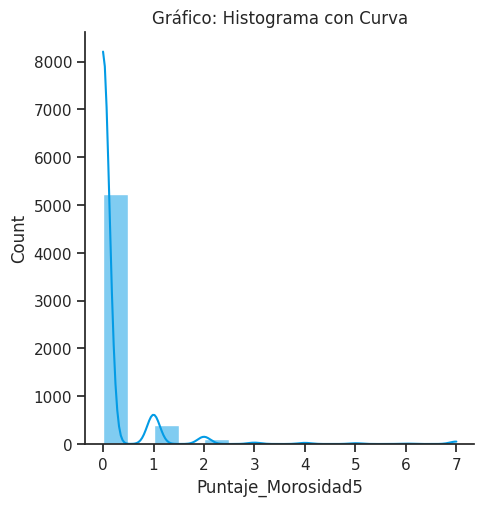

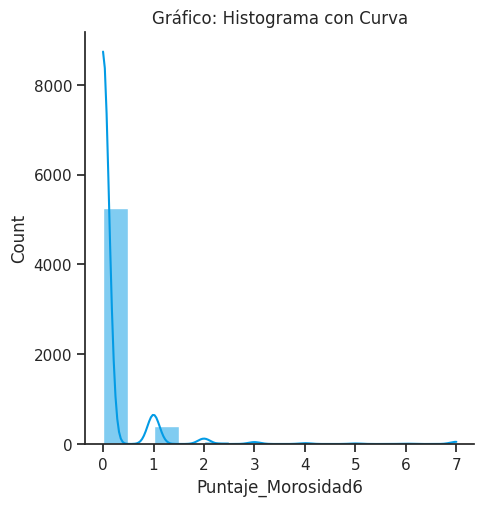

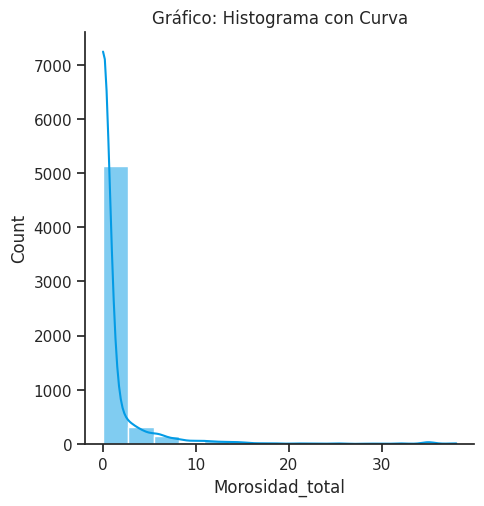

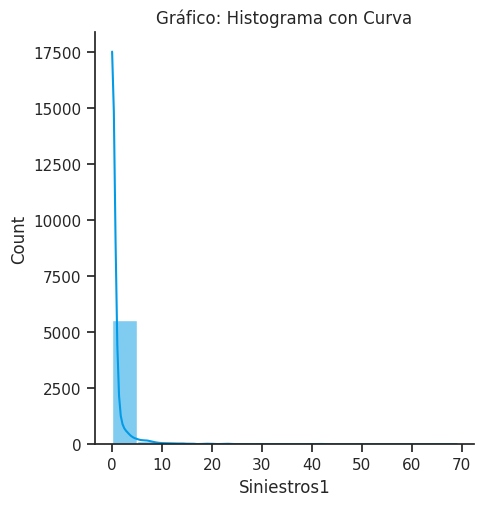

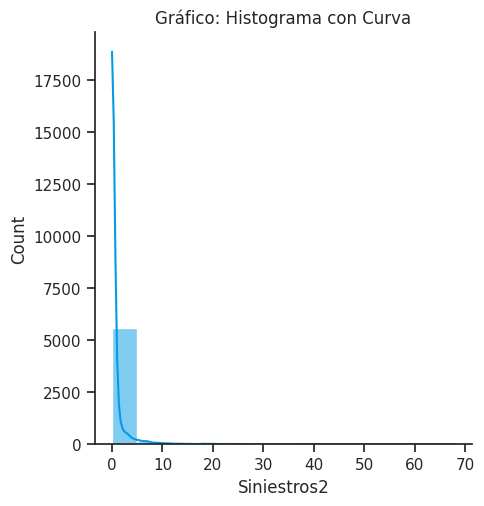

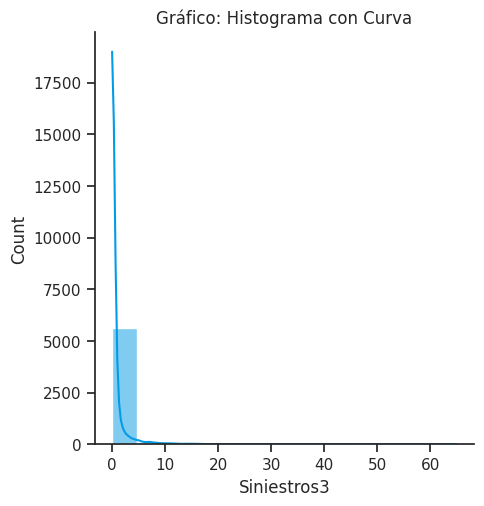

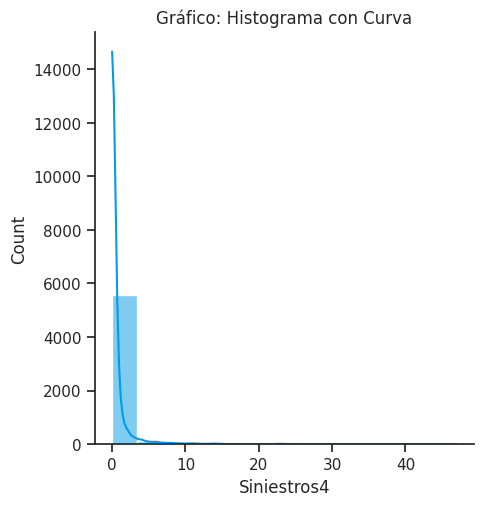

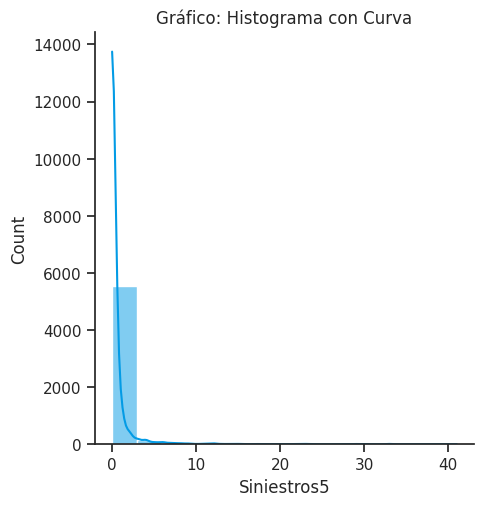

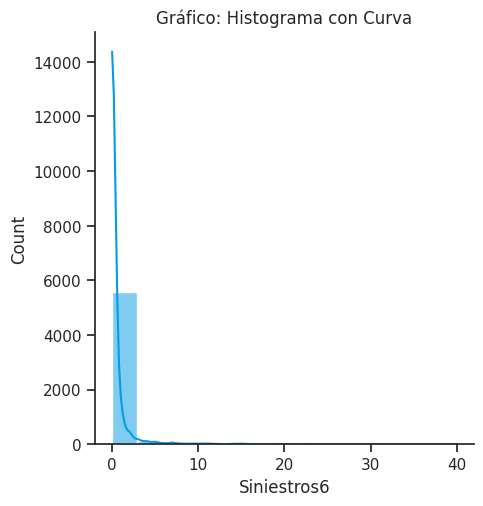

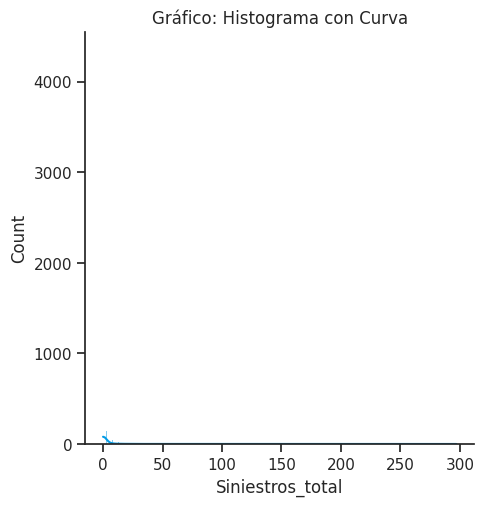

In [30]:
for i in columns:
  displot_varnum(i, data_comp)

In [31]:
def mean_var(x: float):
  return np.mean(x), np.var(x)

In [32]:
d= data_cuantitativo.apply(mean_var, axis=0).T.round(2)
d.columns = ["Media", "Varianza"]
d

,Media,Varianza
Antigüedad_Maxima,49.14,1.994860e+03
Saldo_Pendiente,3240.98,3.791101e+07
Saldo_Pendiente_Seg,4970.52,4.846388e+08
Puntaje_Morosidad1,0.20,4.600000e-01
Puntaje_Morosidad2,0.24,7.700000e-01
Puntaje_Morosidad3,0.21,6.800000e-01
Puntaje_Morosidad4,0.18,5.800000e-01
Puntaje_Morosidad5,0.17,5.200000e-01
Puntaje_Morosidad6,0.16,4.600000e-01
Morosidad_total,1.16,1.545000e+01


### Modelo de segmentación supervisado

In [33]:
r, p = pearsonr(data_comp['Antigüedad_Maxima'], data_comp['Siniestros_total'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=-0.046, p-value=0.001


In [34]:
# Convertimos a las variables cualitativas en variables DUMMY

N_ingresos = pd.get_dummies(data_comp.Nivel_Ingresos, prefix='Nivel_Ingresos')
N_ingresos = N_ingresos.astype(int)

print(N_ingresos.head())

   Nivel_Ingresos_Alto  Nivel_Ingresos_Bajo  Nivel_Ingresos_Medio  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    1                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   Nivel_Ingresos_Medio_alto  Nivel_Ingresos_Medio_bajo  \
0                          0                          1   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          1   

   Nivel_Ingresos_Moderado  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


In [35]:
siniestro = pd.get_dummies(data_comp.Estado_Siniestro, prefix='Estado_Siniestro')
siniestro = siniestro.astype(int)

print(siniestro.head())

   Estado_Siniestro_No_siniestro  Estado_Siniestro_Si_siniestro
0                              1                              0
1                              1                              0
2                              1                              0
3                              1                              0
4                              0                              1


In [74]:
# Unimos todos los 02 DataFrame, incluyendo los dummy

data_analisis = pd.merge(data_cuantitativo, N_ingresos, left_index=True, right_index=True)
data_analisis = pd.merge(data_analisis, siniestro,  left_index=True, right_index=True)

data_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Antigüedad_Maxima              5800 non-null   int64  
 1   Saldo_Pendiente                5800 non-null   float64
 2   Saldo_Pendiente_Seg            5800 non-null   float64
 3   Puntaje_Morosidad1             5800 non-null   int64  
 4   Puntaje_Morosidad2             5800 non-null   int64  
 5   Puntaje_Morosidad3             5800 non-null   int64  
 6   Puntaje_Morosidad4             5800 non-null   int64  
 7   Puntaje_Morosidad5             5800 non-null   int64  
 8   Puntaje_Morosidad6             5800 non-null   int64  
 9   Morosidad_total                5800 non-null   int64  
 10  Siniestros1                    5800 non-null   int64  
 11  Siniestros2                    5800 non-null   int64  
 12  Siniestros3                    5800 non-null   i

In [99]:
# Variables independientes

X_dat = data_analisis.loc[:, ['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg', 'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3', 'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6', 'Morosidad_total', 'Siniestros1', 'Siniestros2', 'Siniestros3', 'Siniestros4', 'Siniestros5', 'Siniestros6', 'Siniestros_total', 'Nivel_Ingresos_Alto', 'Nivel_Ingresos_Bajo', 'Nivel_Ingresos_Medio', 'Nivel_Ingresos_Medio_alto', 'Nivel_Ingresos_Medio_bajo', 'Nivel_Ingresos_Moderado']]
X_dat.head(6)

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,...,Siniestros4,Siniestros5,Siniestros6,Siniestros_total,Nivel_Ingresos_Alto,Nivel_Ingresos_Bajo,Nivel_Ingresos_Medio,Nivel_Ingresos_Medio_alto,Nivel_Ingresos_Medio_bajo,Nivel_Ingresos_Moderado
0,42,0.00,0.0,0,1,0,0,0,0,1,...,9,9,9,54,0,0,0,0,1,0
1,15,5485.37,0.0,1,2,1,0,0,2,6,...,47,33,15,297,0,0,0,0,1,0
2,13,2274.38,0.0,2,1,0,2,3,3,11,...,42,41,33,241,0,1,0,0,0,0
3,33,482.14,0.0,0,0,0,0,0,0,0,...,40,40,40,240,0,0,0,0,1,0
4,29,8.31,0.0,0,7,7,7,7,7,35,...,40,39,39,235,0,0,0,0,1,0
5,24,2722.24,0.0,3,3,2,1,0,3,12,...,37,36,40,234,0,1,0,0,0,0


In [100]:
# variable dependiente
Y_dat = data_analisis.loc[:, ['Estado_Siniestro_Si_siniestro']]
Y_dat.head(6)

,Estado_Siniestro_Si_siniestro
0,0
1,0
2,0
3,0
4,1
5,1


In [92]:
data_analisis.columns

Index(['Antigüedad_Maxima', 'Saldo_Pendiente', 'Saldo_Pendiente_Seg',
       'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3',
       'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',
       'Morosidad_total', 'Siniestros1', 'Siniestros2', 'Siniestros3',
       'Siniestros4', 'Siniestros5', 'Siniestros6', 'Siniestros_total',
       'Nivel_Ingresos_Alto', 'Nivel_Ingresos_Bajo', 'Nivel_Ingresos_Medio',
       'Nivel_Ingresos_Medio_alto', 'Nivel_Ingresos_Medio_bajo',
       'Nivel_Ingresos_Moderado', 'Estado_Siniestro_No_siniestro',
       'Estado_Siniestro_Si_siniestro'],
      dtype='object')

In [101]:
# Información del modelo

modelo = sm.OLS(endog=Y_dat, exog=X_dat,) # agregamos una constante al modelo
modelo = modelo.fit()     # ajustamos el modelo. Por default seré a través de Mínimos Cuadrados Ordinarios
print(modelo.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Estado_Siniestro_Si_siniestro   R-squared:                       0.215
Model:                                       OLS   Adj. R-squared:                  0.212
Method:                            Least Squares   F-statistic:                     79.18
Date:                           Thu, 22 Jun 2023   Prob (F-statistic):          4.76e-285
Time:                                   20:57:07   Log-Likelihood:                -137.05
No. Observations:                           5800   AIC:                             316.1
Df Residuals:                               5779   BIC:                             456.1
Df Model:                                     20                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------

In [102]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Antigüedad_Maxima,-5.311688e-04,-2.230047e-04
Saldo_Pendiente,-1.532652e-07,2.133139e-06
Saldo_Pendiente_Seg,-5.397752e-07,8.033807e-08
Puntaje_Morosidad1,1.022734e-01,1.260056e-01
Puntaje_Morosidad2,-4.995124e-02,-1.297348e-02
Puntaje_Morosidad3,-7.321952e-02,-3.006585e-02
Puntaje_Morosidad4,-3.089395e-02,1.245315e-02
Puntaje_Morosidad5,-4.667813e-03,4.061826e-02
Puntaje_Morosidad6,-3.299048e-02,5.069755e-03
Morosidad_total,2.383291e-02,2.782486e-02


In [104]:
prediccion = modelo.predict(exog = X_dat)

prediccion = pd.DataFrame(
    data=prediccion,
    columns=['prediccion'])

residuos   = prediccion.prediccion - Y_dat.Estado_Siniestro_Si_siniestro #(Y Estimado - Y Real)
residuos

0       0.040229
1       0.367110
2       0.482747
3       0.059865
4      -0.636586
          ...   
5795    0.020948
5796   -0.034953
5797    0.021849
5798    0.020196
5799    0.001109
Length: 5800, dtype: float64

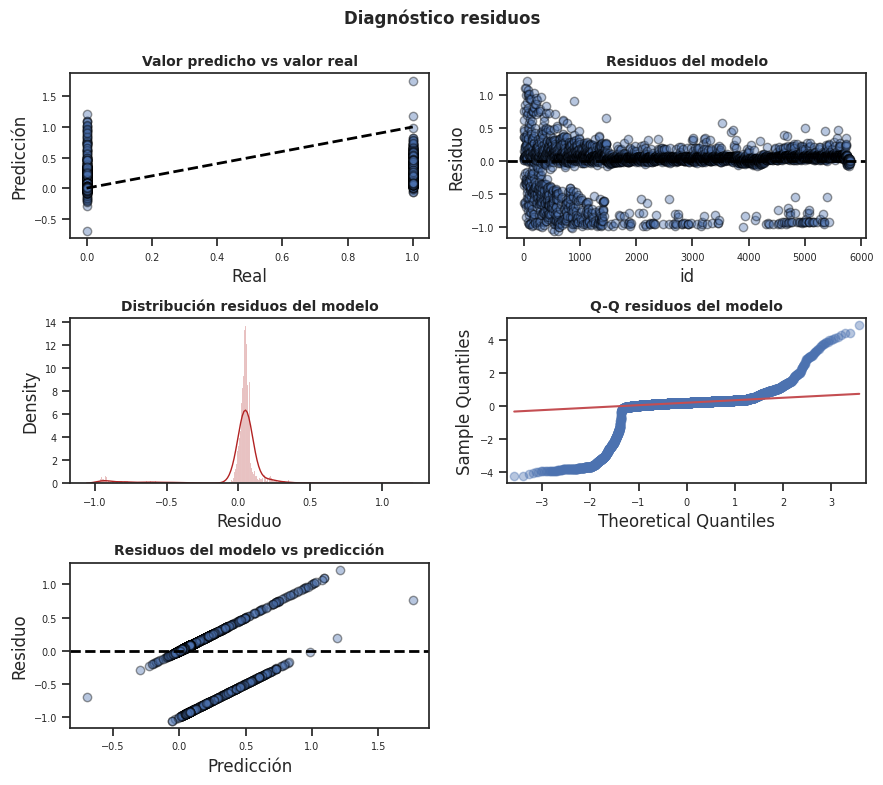

In [105]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y_dat, prediccion.prediccion, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_dat.min(), Y_dat.max()], [Y_dat.min(), Y_dat.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_dat))), residuos ,
                   edgecolors=(0, 0, 0),
                   alpha = 0.4
                   )
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion.prediccion, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [106]:
# Error de test del modelo

X_data = sm.add_constant(X_dat, prepend=True)
predicciones = modelo.predict(exog = X_dat)
rmse = mean_squared_error(
        y_true  = Y_dat,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.24775649666081986


### Modelo de segmentación no supervisado

In [62]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_cuantitativo)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_  # matriz i * j

array([[-2.44565250e-02, -1.68838220e-02, -1.26876915e-02,
         1.74524811e-01,  2.54352153e-01,  2.51565318e-01,
         2.43708959e-01,  2.37006056e-01,  2.27712593e-01,
         2.69545715e-01,  2.90665217e-01,  2.94906625e-01,
         2.97348505e-01,  2.96471723e-01,  2.89368457e-01,
         2.77887449e-01,  3.02852467e-01],
       [ 1.60715044e-02, -4.12905707e-03,  9.05168018e-03,
        -1.40884112e-01, -2.90286066e-01, -3.16865246e-01,
        -3.24036349e-01, -3.18476762e-01, -2.91240184e-01,
        -3.26868564e-01,  2.12358972e-01,  2.28710548e-01,
         2.40581420e-01,  2.43322527e-01,  2.48705091e-01,
         2.46639555e-01,  2.44659945e-01],
       [ 4.82449960e-01,  6.26780910e-01,  5.88196804e-01,
        -1.27627253e-01, -1.89642417e-02,  4.33345422e-03,
         3.32154802e-02,  5.50169528e-02,  6.84455673e-02,
         2.94248190e-03, -2.02129078e-02, -7.88848198e-03,
         6.67936195e-04,  2.31940276e-02,  2.72551694e-02,
         3.33316927e-02,  7.6

In [63]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data_cuantitativo.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17']
)

componentes = componentes.transpose().round(3)
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Antigüedad_Maxima,-0.024,0.016,0.482,-0.563,-0.610,-0.279,0.018,0.001,-0.007,-0.001,0.005,-0.002,0.001,-0.002,-0.001,-0.000,-0.000
Saldo_Pendiente,-0.017,-0.004,0.627,0.281,-0.093,0.719,-0.040,-0.012,0.008,0.004,-0.003,0.003,0.001,0.001,-0.001,0.000,0.000
Saldo_Pendiente_Seg,-0.013,0.009,0.588,0.356,0.411,-0.597,0.036,0.010,-0.008,-0.002,-0.001,-0.002,-0.007,-0.001,-0.005,0.000,0.000
Puntaje_Morosidad1,0.175,-0.141,-0.128,0.560,-0.551,-0.172,-0.085,0.470,-0.169,0.062,-0.023,0.019,-0.002,0.024,0.015,-0.152,0.036
Puntaje_Morosidad2,0.254,-0.290,-0.019,0.131,-0.132,-0.064,-0.154,-0.349,0.577,-0.298,0.446,0.063,-0.024,-0.008,-0.007,-0.196,0.047
Puntaje_Morosidad3,0.252,-0.317,0.004,0.022,-0.033,-0.032,-0.156,-0.392,0.062,0.192,-0.758,-0.058,0.037,-0.002,0.010,-0.185,0.044
Puntaje_Morosidad4,0.244,-0.324,0.033,-0.104,0.099,0.026,-0.083,-0.240,-0.581,0.409,0.454,-0.069,0.012,0.024,-0.038,-0.170,0.040
Puntaje_Morosidad5,0.237,-0.318,0.055,-0.192,0.178,0.072,0.132,0.232,-0.338,-0.730,-0.127,0.032,-0.055,-0.025,0.022,-0.161,0.038
Puntaje_Morosidad6,0.228,-0.291,0.068,-0.247,0.229,0.089,0.292,0.540,0.419,0.399,0.011,0.028,0.022,0.004,0.003,-0.152,0.036
Morosidad_total,0.270,-0.327,0.003,0.033,-0.040,-0.017,-0.023,0.010,0.011,-0.001,0.003,0.002,-0.002,0.003,0.000,0.879,-0.209


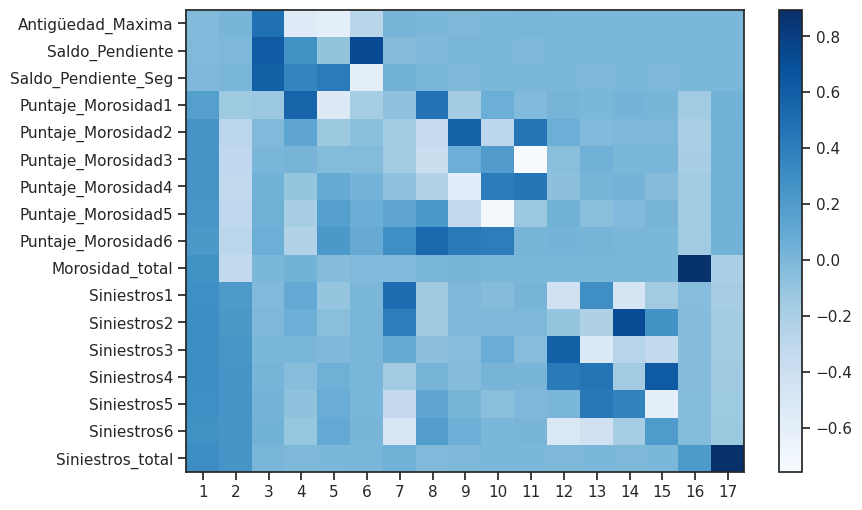

In [64]:
# Heatmap de los 17 componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto')   # cmap= "viridis" "#69d"
plt.yticks(range(len(data_cuantitativo.columns)), data_cuantitativo.columns)
plt.xticks(range(len(data_cuantitativo.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[5.08085655e-01 2.03499802e-01 8.00776618e-02 5.61172449e-02
 5.03228296e-02 4.31342848e-02 1.57580097e-02 1.57212481e-02
 8.56468289e-03 6.27411447e-03 5.28135178e-03 3.48208496e-03
 1.64407201e-03 1.06947827e-03 9.67479454e-04 3.59224845e-32
 1.64262766e-32]


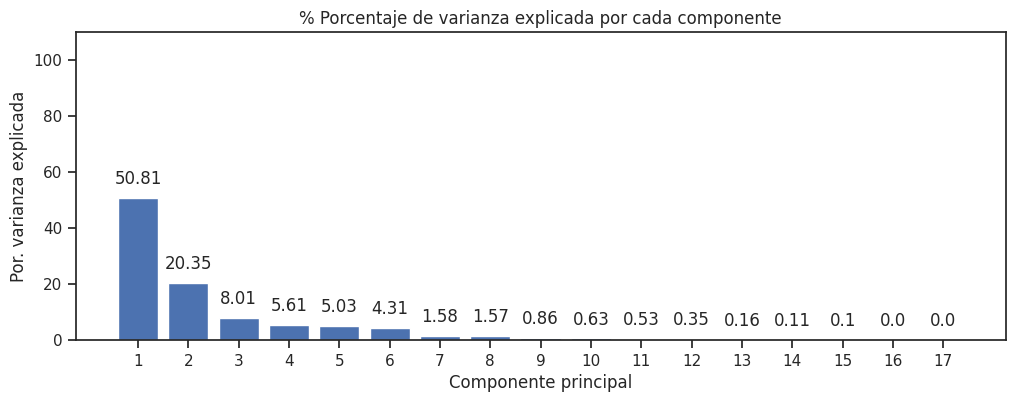

In [65]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_*100
)

for x, y in zip(np.arange(len(data_cuantitativo.columns)) + 1, modelo_pca.explained_variance_ratio_*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1*100)
ax.set_title('% Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.50808566 0.71158546 0.79166312 0.84778036 0.89810319 0.94123748
 0.95699549 0.97271674 0.98128142 0.98755553 0.99283689 0.99631897
 0.99796304 0.99903252 1.         1.         1.        ]


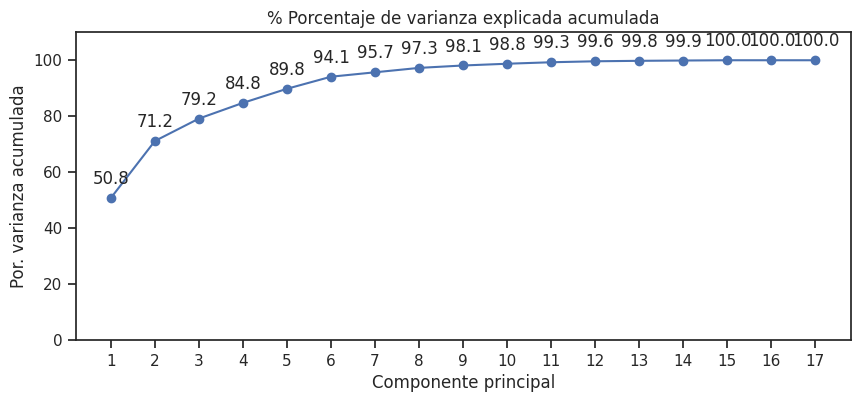

In [66]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(
    np.arange(len(data_cuantitativo.columns)) + 1,
    prop_varianza_acum*100,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_cuantitativo.columns)) + 1, prop_varianza_acum*100):
    label = round(y, 1)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1*100)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [67]:
datos_scaled = scale(X=data_cuantitativo, axis=0, with_mean=True, with_std=True)

datos_scaled = pd.DataFrame(datos_scaled,
                            columns=data_cuantitativo.columns,
                            index=data_cuantitativo.index)
datos_scaled.head(4)

,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total
0,-0.159803,-0.526374,-0.225784,-0.293559,0.870738,-0.255226,-0.240068,-0.239882,-0.232761,-0.040312,2.667487,2.916197,3.088258,3.290456,3.538935,3.771659,3.296956
1,-0.764319,0.364515,-0.225784,1.179316,2.009985,0.957151,-0.240068,-0.239882,2.711656,1.231789,22.033398,23.516129,23.670727,18.080833,13.528182,6.420414,19.155454
2,-0.809098,-0.156988,-0.225784,2.652191,0.870738,-0.255226,2.394544,3.929892,4.183865,2.503891,13.318738,13.739890,15.584757,16.134731,16.857931,14.366678,15.500820
3,-0.361308,-0.448068,-0.225784,-0.293559,-0.268509,-0.255226,-0.240068,-0.239882,-0.232761,-0.294733,12.673208,13.739890,14.482124,15.356290,16.441713,17.456892,15.435559


In [68]:
# Cálculo de distancias

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,5790,5791,5792,5793,5794,5795,5796,5797,5798,5799
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42.620018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32.401651,19.015835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31.546690,20.972005,8.596106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37.696626,28.401137,16.900665,22.397714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,31.345616,20.884841,7.247835,8.524139,17.535066,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.564389,21.754516,8.785394,2.061402,22.411930,8.571065,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,26.723989,20.498483,12.210359,12.911832,22.000932,10.301967,12.076534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
21297473,5673,3671,0.0
20589708,5508,3549,0.0
21743993,5593,3748,0.0
21743985,5585,3748,0.0
21743961,5561,3748,0.0
20593609,3609,3550,0.0
20593621,3621,3550,0.0
20593628,3628,3550,0.0
21743947,5547,3748,0.0
21743861,5461,3748,0.0


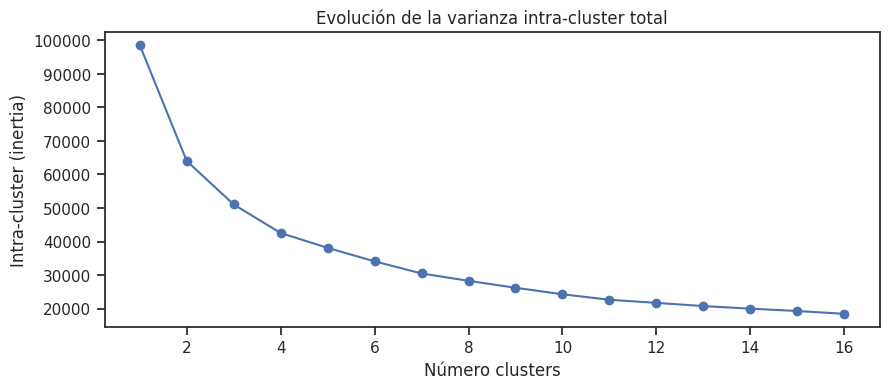

In [70]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 17)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(10, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

In [71]:
kmeans = KMeans(n_clusters=4).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)
print("Numeros de cluster:", kmeans.n_clusters)

[[ 2.32026965e-02  1.42339924e-02  1.12951124e-02 -1.88627889e-01
  -1.91796066e-01 -1.86218219e-01 -1.69007632e-01 -1.62577587e-01
  -1.49237530e-01 -2.02685247e-01 -1.67214740e-01 -1.63752415e-01
  -1.57356417e-01 -1.50119300e-01 -1.42772946e-01 -1.33562340e-01
  -1.59659402e-01]
 [-1.02369104e-01 -2.45046627e-01 -2.15043409e-01  1.21133512e+00
   7.28519503e+00  7.88878544e+00  8.29378441e+00  8.06944937e+00
   7.80037767e+00  7.91861870e+00  1.13786098e+00  1.16284949e+00
   1.29048753e+00  1.35281533e+00  1.37640758e+00  1.28605251e+00
   1.30932379e+00]
 [-9.18284554e-03 -3.02429082e-01 -1.64059787e-04  1.24626497e+00
   2.63139302e+00  2.38996022e+00  2.21491174e+00  2.16089686e+00
   2.04247040e+00  2.48076157e+00  8.29387124e+00  8.59784207e+00
   8.99402283e+00  9.23491406e+00  9.24302209e+00  9.06916885e+00
   9.21941975e+00]
 [-3.58157702e-01 -1.55517720e-01 -1.52165596e-01  2.70510915e+00
   1.73711193e+00  1.59600828e+00  1.28627195e+00  1.22078735e+00
   1.05872722e+00  

In [72]:
cluster = kmeans.predict(datos_scaled)
cluster

array([3, 2, 2, ..., 0, 0, 0], dtype=int32)

In [48]:
data_cuantitativo_id['cluster'] = cluster
data_cuantitativo_id['cluster'].replace({0: "Clúster 0",  # etiquetamos los grupos
                                   1: "Clúster 1",
                                   2: "Clúster 2",
                                   3: "Clúster 3"},
                                  inplace=True)
data_cuantitativo_id.head()

,Cliente_ID,Antigüedad_Maxima,Saldo_Pendiente,Saldo_Pendiente_Seg,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Morosidad_total,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Siniestros_total,cluster
0,94130,42,0.00,0.0,0,1,0,0,0,0,1,9,9,9,9,9,9,54,Clúster 3
1,17565,15,5485.37,0.0,1,2,1,0,0,2,6,69,68,65,47,33,15,297,Clúster 2
2,624525,13,2274.38,0.0,2,1,0,2,3,3,11,42,40,43,42,41,33,241,Clúster 2
3,136621,33,482.14,0.0,0,0,0,0,0,0,0,40,40,40,40,40,40,240,Clúster 2
4,512599,29,8.31,0.0,0,7,7,7,7,7,35,39,39,39,40,39,39,235,Clúster 2


In [50]:
# Perfilando cada Estrato. Podemos añadir variables cualitativas para su mejor entendimiento.
#---------------------------------------------------------------------------------------------
data_cuantitativo_id.groupby(['cluster'])[columns].mean().round(2).T

cluster,Clúster 0,Clúster 1,Clúster 2,Clúster 3
Cliente_ID,397145.59,432161.26,343539.03,391491.77
Antigüedad_Maxima,50.14,44.57,45.36,34.21
Saldo_Pendiente,3329.82,1732.18,1496.24,2234.36
Saldo_Pendiente_Seg,5225.46,236.44,5603.69,1486.09
Puntaje_Morosidad1,0.07,1.02,1.18,2.00
Puntaje_Morosidad2,0.07,6.63,2.85,1.73
Puntaje_Morosidad3,0.06,6.72,2.46,1.48
Puntaje_Morosidad4,0.06,6.48,2.05,1.13
Puntaje_Morosidad5,0.06,5.98,1.85,1.04
Puntaje_Morosidad6,0.06,5.46,1.62,0.87


In [55]:
cluster_count = (data_cuantitativo_id
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
Clúster 0,5377,5377
Clúster 1,46,5423
Clúster 2,39,5462
Clúster 3,338,5800


In [61]:
def graficar_nums(cluster, var_num, data):

  fig, ax = plt.subplots(figsize=(6, 3.84))

  sns.violinplot(
          x     = cluster,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )

  ax.set_title(f'{var_num} por Cluster');

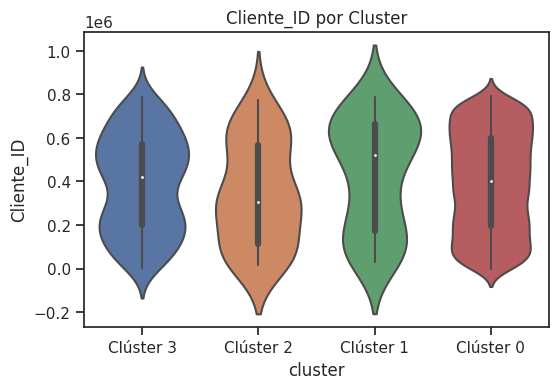

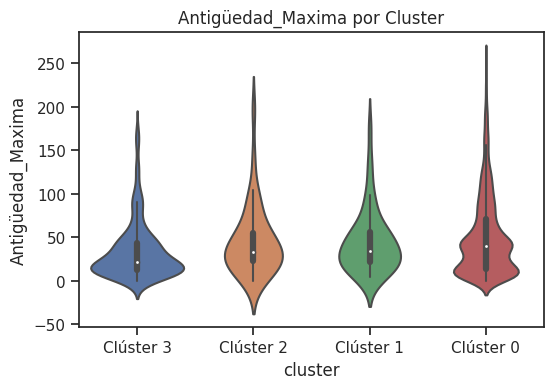

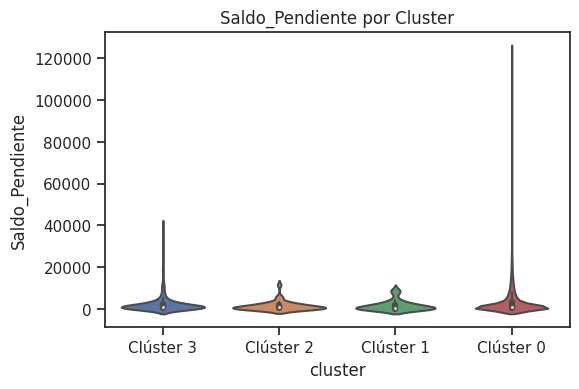

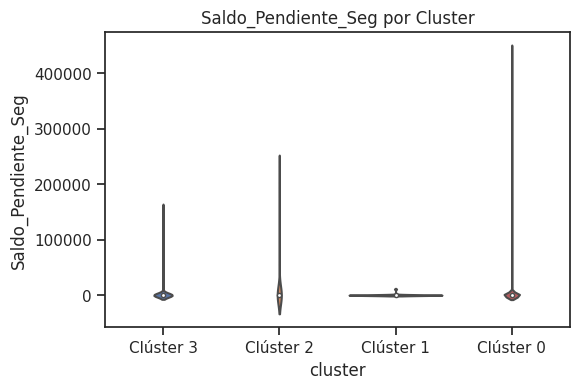

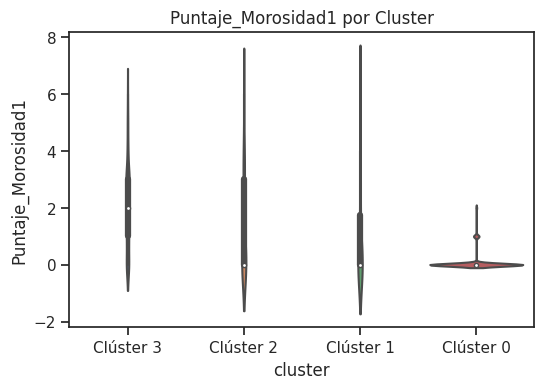

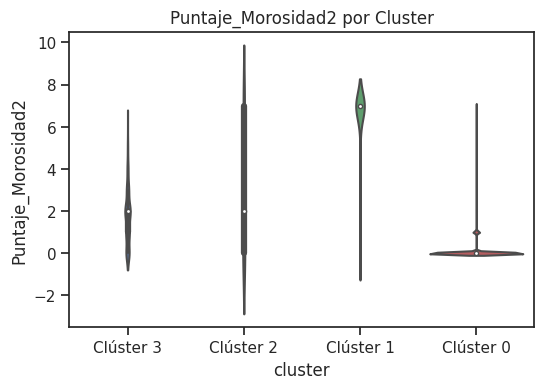

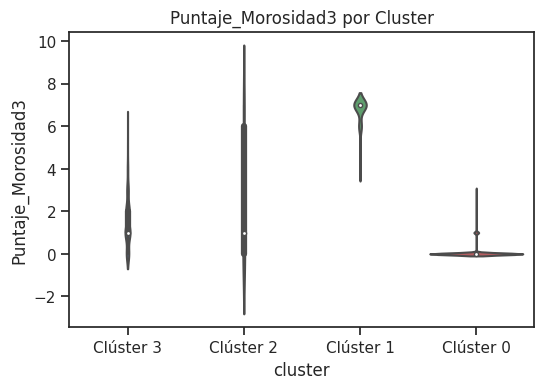

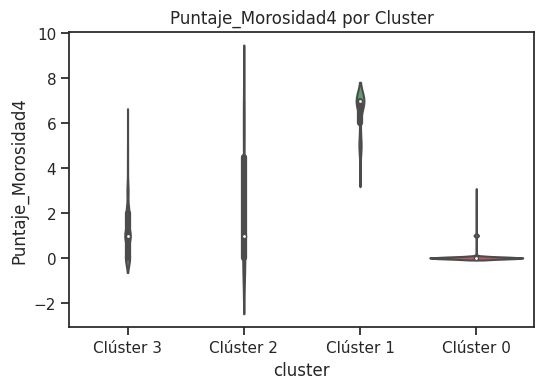

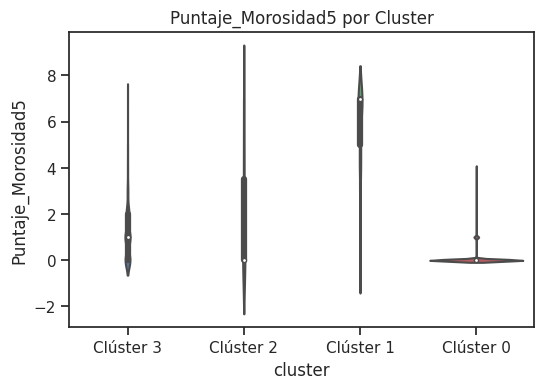

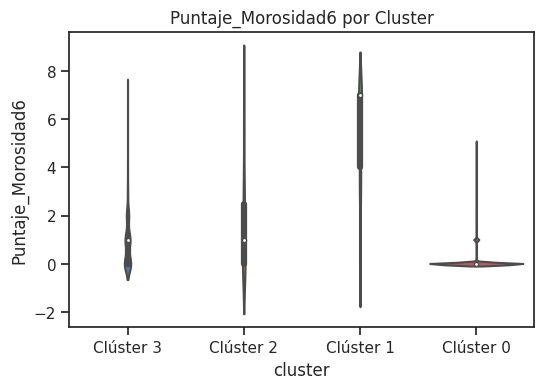

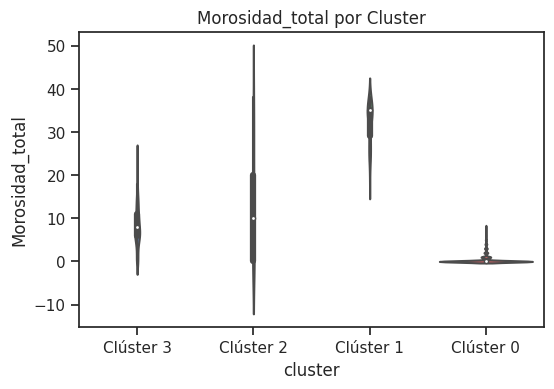

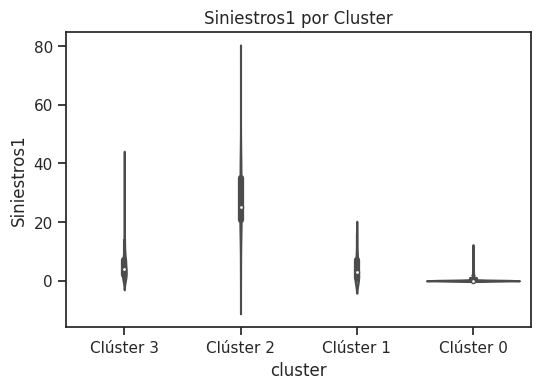

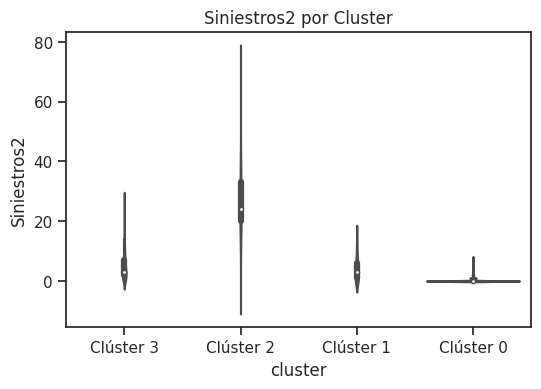

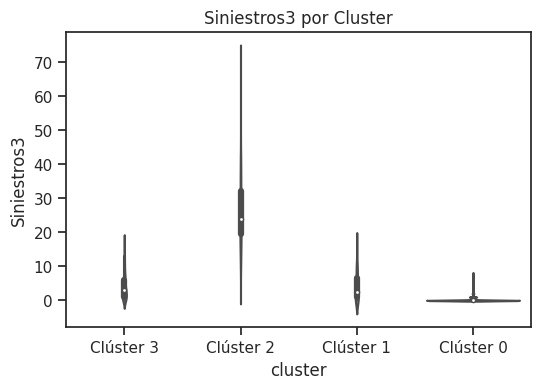

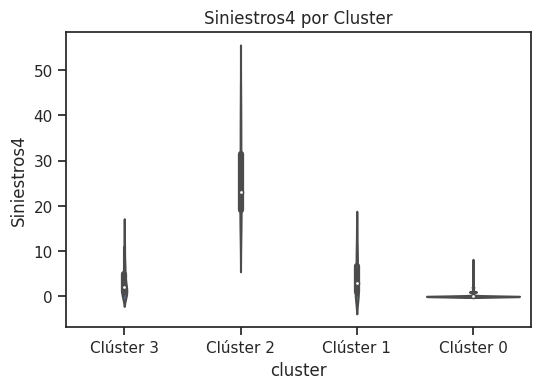

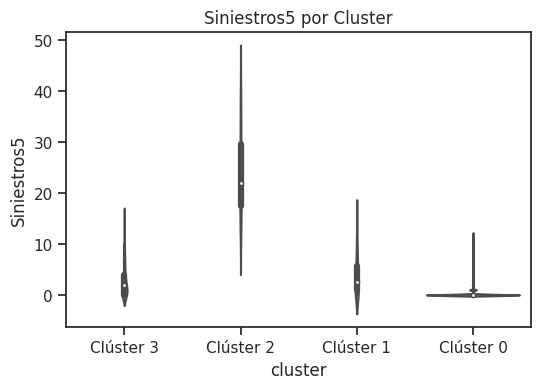

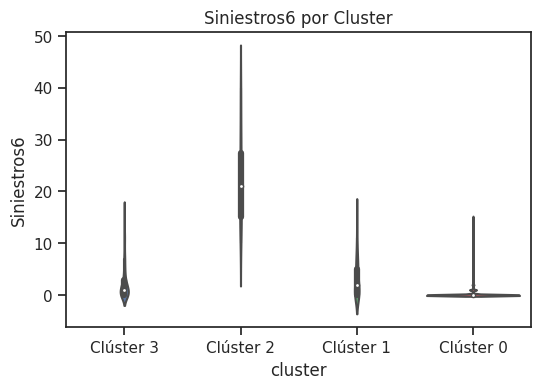

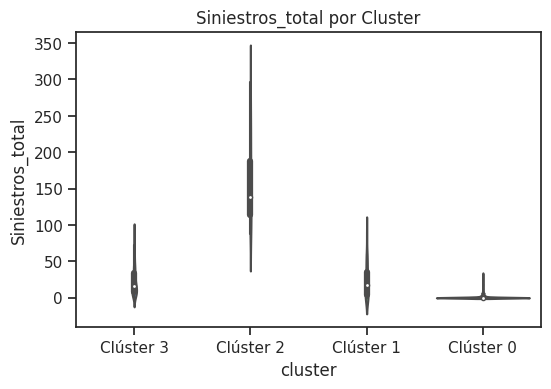

In [56]:
cluster = 'cluster'

for i in columns:
  graficar_nums(cluster, i, data_cuantitativo_id)

In [58]:
mod = ols('Siniestros_total ~ cluster', data =data_cuantitativo_id).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df           F  PR(>F)
cluster   1.041219e+06     3.0  6274.78697     0.0
Residual  3.205903e+05  5796.0         NaN     NaN


In [73]:
# prueba Tukey cada par de grupos.
# Se busca un P-value menor a 0.05
res = stat()
res.tukey_hsd(df=data_cuantitativo_id, res_var='Siniestros_total', xfac_var='cluster', anova_model='Siniestros_total ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Clúster 3,Clúster 2,129.366864,126.134763,132.598965,145.461145,0.001
1,Clúster 3,Clúster 1,0.679573,-2.323966,3.683112,0.822265,0.900
2,Clúster 3,Clúster 0,21.852189,20.780460,22.923917,74.100163,0.001
3,Clúster 2,Clúster 1,128.687291,124.527197,132.847385,112.419432,0.001
4,Clúster 2,Clúster 0,151.219053,148.147613,154.290492,178.926011,0.001
5,Clúster 1,Clúster 0,22.531762,19.701831,25.361692,28.935318,0.001
